# Prior Knowledge

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import geopandas as gpd
import os
import re
from matplotlib.ticker import MaxNLocator
from load_files import get_measurements
path = "/Users/blazejmanczak/Desktop/Q1/DataChallenge3/waterschap-aa-en-maas_sewage_2019/"

%matplotlib inline

In [11]:
flow_data, level_data = get_measurements(path + "sewer_data/data_pump/RG8150", False)

In [12]:
level_data.describe()

,RG_ID,Value,DataQuality
count,884203.0,884203.000000,884203.000000
mean,8150.0,-0.797148,0.994882
std,0.0,0.381277,0.071354
min,8150.0,-1.811214,0.000000
25%,8150.0,-1.103166,1.000000
50%,8150.0,-0.783741,1.000000
75%,8150.0,-0.483211,1.000000
max,8150.0,2.175049,1.000000


In [13]:
flow_data.describe()

,RG_ID,Value,DataQuality
count,2885145.0,2.885145e+06,2.885145e+06
mean,8150.0,4.244629e+02,9.984247e-01
std,0.0,2.191488e+02,3.965892e-02
min,8150.0,0.000000e+00,0.000000e+00
25%,8150.0,2.689742e+02,1.000000e+00
50%,8150.0,5.083130e+02,1.000000e+00
75%,8150.0,5.471727e+02,1.000000e+00
max,8150.0,1.200000e+03,1.000000e+00


In [15]:
level_data["TimeStamp"] = level_data.apply(lambda row: datetime.datetime.strptime(row["TimeStamp"], '%d-%m-%Y %H:%M:%S'), axis = 1)
flow_data["TimeStamp"] = flow_data.apply(lambda row: datetime.datetime.strptime(row["TimeStamp"], '%d-%m-%Y %H:%M:%S'), axis = 1)

In [16]:
flow_data.set_index('TimeStamp', inplace= True)
level_data.set_index('TimeStamp', inplace= True)

Text(0.5,0,'Date')

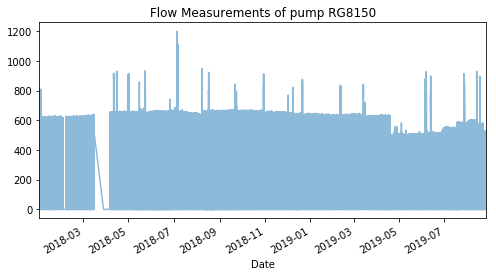

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
flow_data['Value'].plot(alpha = 0.5)
ax.set_title('Flow Measurements of pump RG8150')
ax.set_xlabel('Date')

Text(0.5,0,'Date')

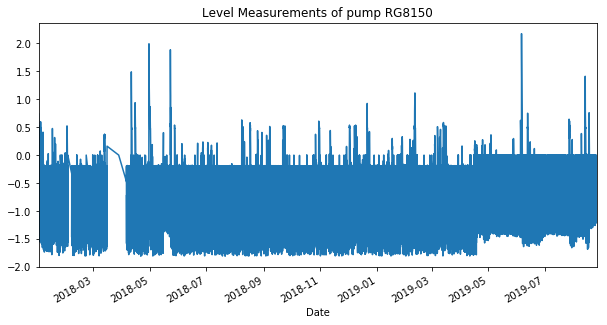

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
level_data['Value'].plot()

ax.set_title('Level Measurements of pump RG8150')
ax.set_xlabel('Date')


# Daily

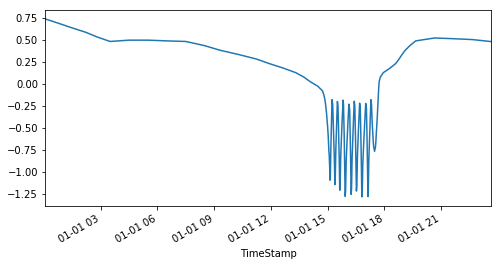

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
level_data['1-1-2018']['Value'].plot()

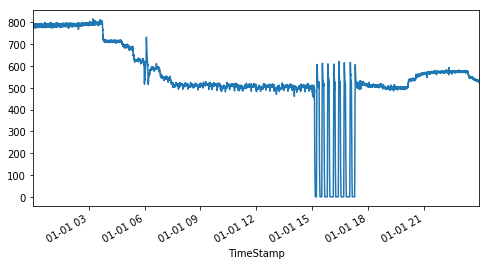

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
flow_data['1-1-2018']['Value'].plot()

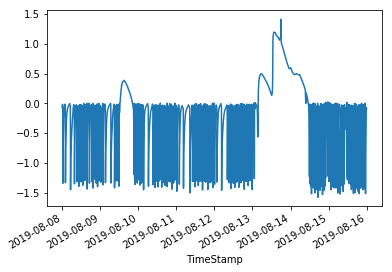

In [15]:
level_data.loc['8-8-2019':'8-15-2019']['Value'].plot()

Text(0.5,1,'Level data on July 1, 2019')

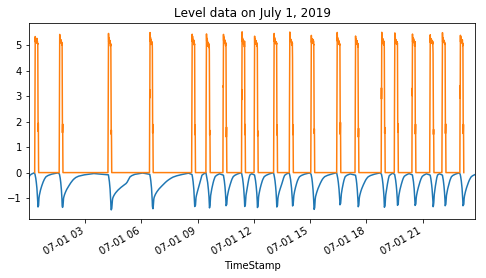

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
level_data['7-1-2019']['Value'].plot()
(flow_data['7-1-2019']['Value'] * 0.01).plot()
ax.set_title('Level data on July 1, 2019')

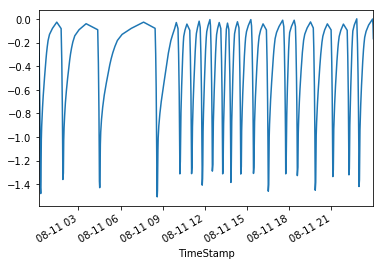

In [16]:
level_data['8-11-2019']['Value'].plot()

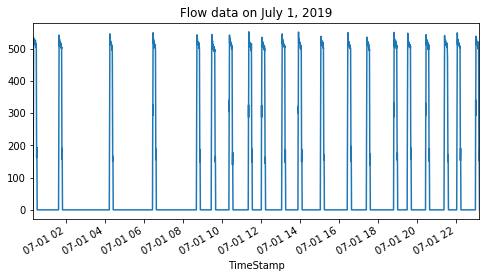

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Flow data on July 1, 2019')
flow_data['7-1-2019']['Value'].plot()

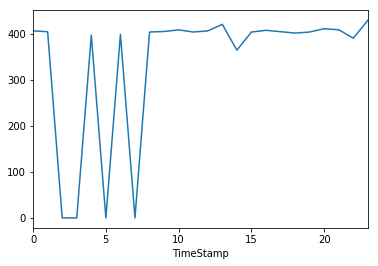

In [46]:
flow_data['7-1-2019'].groupby(flow_data['7-1-2019'].index.hour).mean()['Value'].plot()

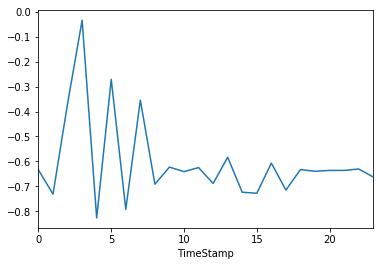

In [47]:
level_data['7-1-2019'].groupby(level_data['7-1-2019'].index.hour).mean()['Value'].plot()

# Daily Schedule of households

In [101]:
oneday = level_data['7-1-2019']
oneday.head()

,RG_ID,Value,DataQuality
TimeStamp,,,
2019-07-01 00:00:35,8150,-0.211448,1
2019-07-01 00:01:45,8150,-0.158658,1
2019-07-01 00:03:00,8150,-0.107544,1
2019-07-01 00:08:35,8150,-0.056415,1
2019-07-01 00:17:20,8150,-0.005437,1


In [102]:
oneday_flow = flow_data['7-1-2019']

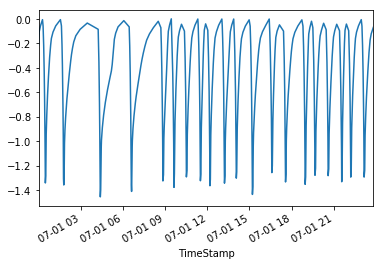

In [103]:
oneday['Value'].plot()

In [104]:
oneday['CUMSUM_Value'] = oneday['Value'].cumsum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


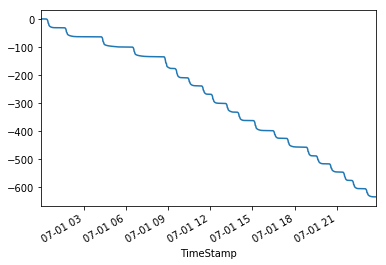

In [105]:
oneday['CUMSUM_Value'].plot()

In [106]:
level_data['Value'].min()

-1.811214

In [107]:
oneday['Value_corrected'] = oneday['Value'] - level_data['Value'].min()
oneday['Value_corrected'].head()

#Ik heb geprobeerd om te corrigeren voor NAP. 
#Op minimaal NAP = -1.811214 assume ik dat dit het geval is dat het level 0 is omdat er net gepompt is
#Nu werk ik met positieve getallen vanaf punt 0. Waar Value Corrected 0 is is 'de bak' leeg

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


TimeStamp
2019-07-01 00:00:35    1.599767
2019-07-01 00:01:45    1.652556
2019-07-01 00:03:00    1.703670
2019-07-01 00:08:35    1.754799
2019-07-01 00:17:20    1.805777
Name: Value_corrected, dtype: float64

In [108]:
oneday['CUMSUM_Value_corrected'] = oneday['Value_corrected'].cumsum()
oneday['CUMSUM_Value_corrected'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


TimeStamp
2019-07-01 00:00:35    1.599767
2019-07-01 00:01:45    3.252323
2019-07-01 00:03:00    4.955992
2019-07-01 00:08:35    6.710791
2019-07-01 00:17:20    8.516568
Name: CUMSUM_Value_corrected, dtype: float64

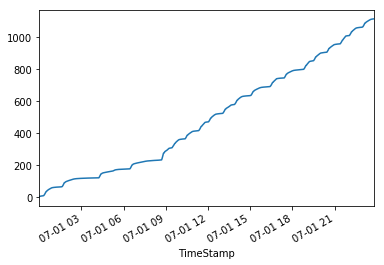

In [109]:
(oneday['CUMSUM_Value_corrected']).plot()

In [147]:
oneday = level_data['7-1-2019']
oneday['time'] = oneday.index
oneday.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RG_ID,Value,DataQuality,time
TimeStamp,,,,
2019-07-01 00:00:35,8150,-0.211448,1,2019-07-01 00:00:35
2019-07-01 00:01:45,8150,-0.158658,1,2019-07-01 00:01:45
2019-07-01 00:03:00,8150,-0.107544,1,2019-07-01 00:03:00
2019-07-01 00:08:35,8150,-0.056415,1,2019-07-01 00:08:35
2019-07-01 00:17:20,8150,-0.005437,1,2019-07-01 00:17:20


Text(0.5,0,'Hour of the day')

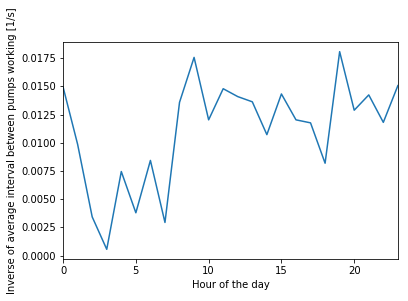

In [148]:
ax = (1/oneday[['time']].diff()['time'].apply(lambda i: i.seconds).groupby(oneday.index.hour).mean()).plot()
ax.set_ylabel("Inverse of average interval between pumps working [1/s]")
ax.set_xlabel("Hour of the day")

# Rainfall

In [150]:
def get_rain(path, convert_time=False):
    files = os.listdir(path)
    data = [pd.read_csv(path + "/" + i, sep = ",", skiprows=2) for i in files]
    data =  pd.concat(data, axis= 0, join= 'outer')

    if convert_time == True:
        data["Begin"] = data.apply(lambda row: datetime.datetime.strptime(row["Begin"], '%d-%m-%Y %H:%M:%S'), axis = 1)
        data["Eind"] = data.apply(lambda row: datetime.datetime.strptime(row["Eind"], '%d-%m-%Y %H:%M:%S'), axis = 1)
    
    return data

rain = get_rain(path + "sewer_data/rain_timeseries", True)
rain

,Begin,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,...,Ooivaarsrijt,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg
0,2018-12-31 23:00:00,2018-12-31 23:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-12-31 23:05:00,2018-12-31 23:10:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-31 23:10:00,2018-12-31 23:15:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-31 23:15:00,2018-12-31 23:20:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-31 23:20:00,2018-12-31 23:25:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,2019-05-31 21:35:00,2019-05-31 21:40:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8924,2019-05-31 21:40:00,2019-05-31 21:45:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8925,2019-05-31 21:45:00,2019-05-31 21:50:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8926,2019-05-31 21:50:00,2019-05-31 21:55:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
rain['Total'] = rain[rain.columns[3:]].sum(axis= 1)

In [22]:
rain.set_index('Begin', inplace= True)
rain.sort_index(inplace=True)

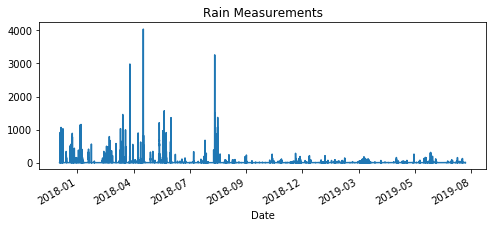

In [23]:
fig, ax = plt.subplots(figsize=(8, 3))
rain['Total'].plot()
ax.set_title('Rain Measurements')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(MaxNLocator(8))
#ax.set_xticklabels([ax.get_xticks()])#[i] for i in range(0, 8, 2)])


In [149]:
rain2 = rain.reset_index().copy()
fig, ax = plt.subplots(figsize=(8, 4))
rain2[rain2['Eind']- rain2['Begin'] == "00:05:00"].set_index('Begin')['Total'].plot()
ax.set_title('Rain Measurements for intervals of 5 minutes')
ax.set_xlabel('Date')



NameError: name 'rain' is not defined

In [ ]:
rain2 = rain.reset_index().copy()
fig, ax = plt.subplots(figsize=(8, 4))
rain2[rain2['Eind']- rain2['Begin'] == "00:60:00"].set_index('Begin')['Total'].plot()
ax.set_title('Rain Measurements for intervals of 60 minutes')
ax.set_xlabel('Date')

In [ ]:
level2 = level_data.copy()
level2['Value(mm)'] = level2['Value'] * 1000
level2['Value(mm)'] = level2['Value(mm)'] + abs(level2['Value(mm)'].min())
level2['Value(mm)'].plot()